<a href="https://colab.research.google.com/github/rlcoelho/mvp-qualidade/blob/master/MVP3_MeuColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes
### Prática de Machine Learning em Python
##### Problema. Saber a qualidade do vinho a partir dos parametros

## Imports para criação e treinamento do modelo

In [59]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pickle import dump

## Carga do Dataset

In [60]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/RodolphoGLC/teste/refs/heads/main/winequality-red.csv"

dataset = pd.read_csv(url, delimiter=',')

dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploração dos dados

In [61]:
def get_df_info(dataset):
    print("\n\033[1mFormato do DataFrame:\033[0m ", dataset.shape)
    print("\n\033[1mColunas no DataFrame:\033[0m ", dataset.columns.to_list())
    print("\n\033[1mTipos de dados das colunas:\033[0m\n", dataset.dtypes)

    print("\n\033[1mInformações sobre o DataFrame:\033[0m")
    dataset.info()

    print("\n\033[1mNúmero de valores exclusivos em cada coluna:\033[0m")
    for col in dataset.columns:
        print(f"\033[1m{col}\033[0m: {dataset[col].nunique()}")

    print("\n\033[1mNúmero de valores nulos em cada coluna:\033[0m\n", dataset.isnull().sum())
    print("\n\033[1mNúmero de linhas duplicadas:\033[0m ", dataset.duplicated().sum())
    print("\n\033[1mEstatísticas do DataFrame:\033[0m\n", dataset.describe().transpose())

# Chamada da função
get_df_info(dataset)


Formato do DataFrame:  (1599, 12)

Colunas no DataFrame:  ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Tipos de dados das colunas:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-nu

## Pré Processamento e separação em conjunto de treino e conjunto de teste com holdout

In [62]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 202507 # semente aleatória

array = dataset.values

# Divide o DataFrame em (X) e (y)
X = array[:,0:11]
y = array[:,11]


# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.496487 (0.048866)
CART: 0.590262 (0.027811)
NB: 0.534787 (0.030973)
SVM: 0.500443 (0.033271)


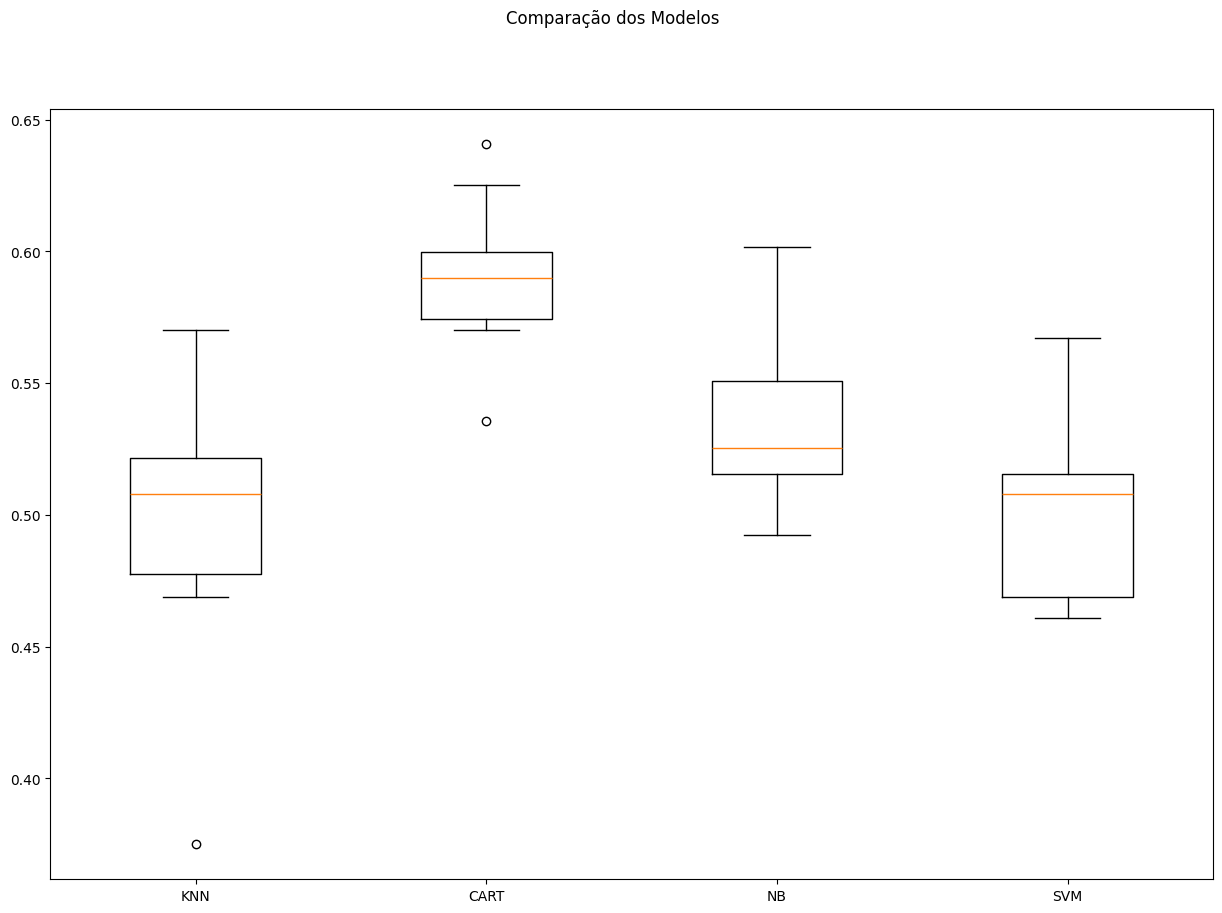

In [63]:
np.random.seed(202507) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.496 (0.049)
CART-orig: 0.590 (0.028)
NB-orig: 0.535 (0.031)
SVM-orig: 0.500 (0.033)
KNN-padr: 0.564 (0.037)
CART-padr: 0.593 (0.026)
NB-padr: 0.538 (0.033)
SVM-padr: 0.613 (0.029)
KNN-norm: 0.555 (0.029)
CART-norm: 0.596 (0.030)
NB-norm: 0.538 (0.033)
SVM-norm: 0.597 (0.046)


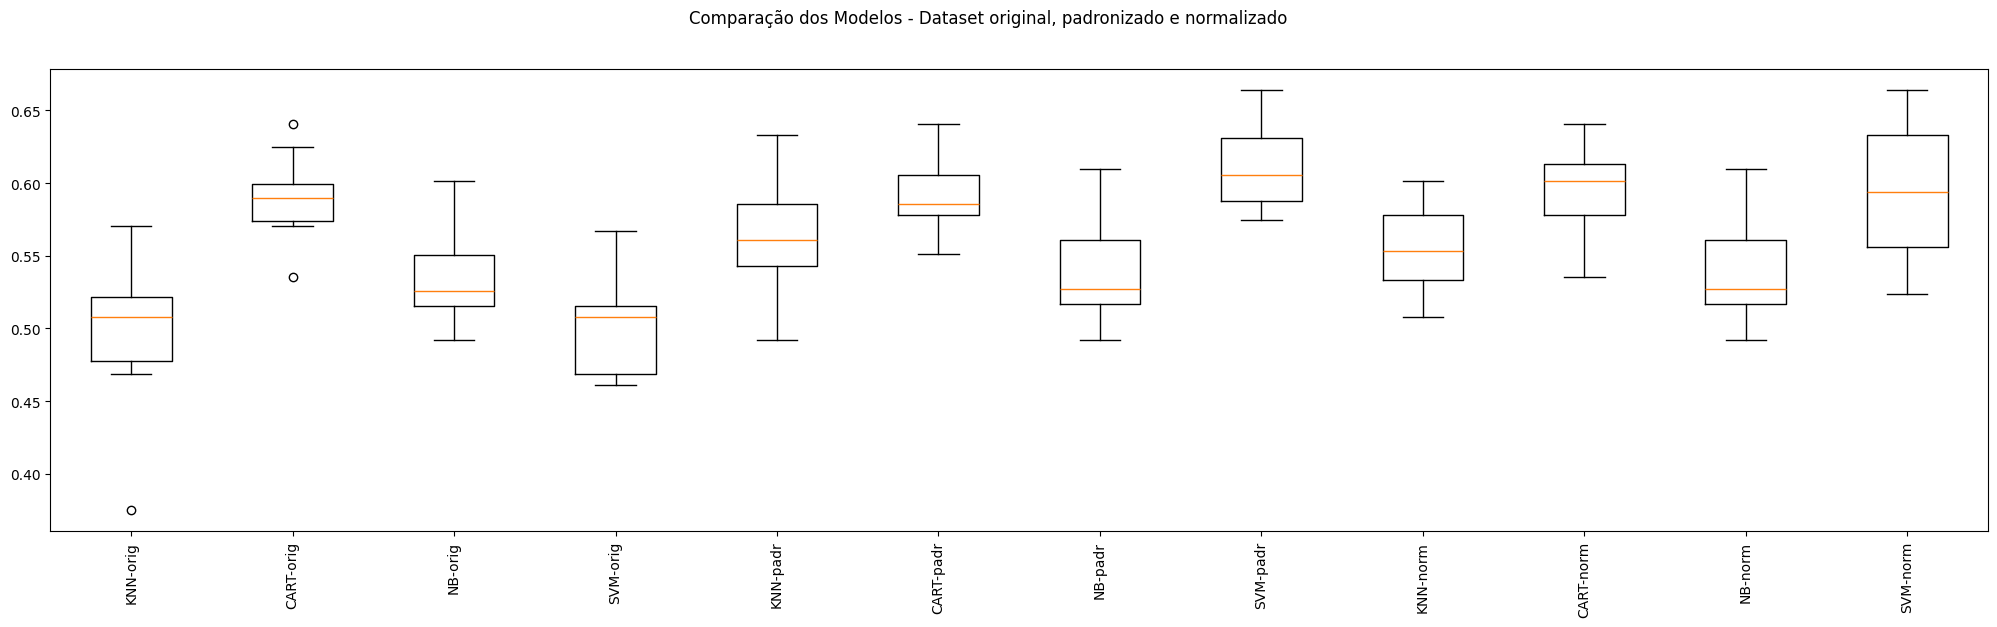

In [64]:
np.random.seed(202507) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização com hiperparâmetros

#### Otimização do KNN

In [7]:
# Tuning do KNN
# Utilizando hiperparâmetros: n_neighbors e metric

# O melhor Resultado: knn-padr - Melhor: 0.623161 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}

np.random.seed(202507) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: knn-orig - Melhor: 0.574705 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Resultado: knn-padr - Melhor: 0.623161 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Resultado: knn-norm - Melhor: 0.620011 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


#### Otimização do SVM

In [39]:
# Tuning do SVM
# Utilizando hiperparâmetros: C (Regularização) e Gamma

# O melhor Resultado: svm-padr - Melhor: 0.646610 usando {'SVM__C': 1, 'SVM__gamma': 1}

np.random.seed(202507) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('svm-orig', Pipeline(steps=[svm])))
pipelines.append(('svm-padr', Pipeline(steps=[standard_scaler, svm])))
pipelines.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm])))

param_grid = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__gamma': [1, 0.1, 0.01, 0.001]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: svm-orig - Melhor: 0.580967 usando {'SVM__C': 100, 'SVM__gamma': 0.1}
Resultado: svm-padr - Melhor: 0.646610 usando {'SVM__C': 1, 'SVM__gamma': 1}
Resultado: svm-norm - Melhor: 0.598899 usando {'SVM__C': 100, 'SVM__gamma': 1}


#### Otimização do Naive Bayes

In [11]:
# Tuning do Gaussian Naive Bayes
# Utilizando hiperparâmetro: var_smoothing

# O melhor Resultado: nb-padr - Melhor: 0.537906 usando {'NB__var_smoothing': 1e-09}

np.random.seed(202507) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
nb = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('nb-orig', Pipeline(steps=[nb])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, nb])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, nb])))

param_grid = {
    'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: nb-orig - Melhor: 0.551193 usando {'NB__var_smoothing': 1e-05}
Resultado: nb-padr - Melhor: 0.537906 usando {'NB__var_smoothing': 1e-09}
Resultado: nb-norm - Melhor: 0.537906 usando {'NB__var_smoothing': 1e-09}


#### Otimização da Árvore de Decisão

In [12]:
# Tuning da Árvore de Decisão
# Utilizando hiperparâmetros: criterion, max_depth, min_samples_split, min_samples_leaf, max_features

# Melhor Resultado: cart-norm - Melhor: 0.623930 usando {'CART__criterion': 'gini', 'CART__max_depth': 50, 'CART__max_features': 'sqrt', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}

np.random.seed(202507) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = {
    'CART__criterion': ['gini', 'entropy'],
    'CART__max_depth': [None, 10, 20, 30, 40, 50],
    'CART__min_samples_split': [2, 5, 10],
    'CART__min_samples_leaf': [1, 2, 4],
    'CART__max_features': [None, 'sqrt', 'log2']
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: cart-orig - Melhor: 0.609849 usando {'CART__criterion': 'entropy', 'CART__max_depth': 50, 'CART__max_features': 'log2', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Resultado: cart-padr - Melhor: 0.616929 usando {'CART__criterion': 'entropy', 'CART__max_depth': None, 'CART__max_features': 'sqrt', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Resultado: cart-norm - Melhor: 0.623930 usando {'CART__criterion': 'gini', 'CART__max_depth': 50, 'CART__max_features': 'sqrt', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}


## Finalização do Modelo

In [65]:
# Após treinar o scaler com X_train
scaler = MinMaxScaler().fit(X_train)

# Escalar X_train
rescaledX = scaler.transform(X_train)

# Treinar o modelo
model = SVC(C=1, gamma=1)
model.fit(rescaledX, y_train)

# Escalar X_test usando o mesmo scaler (isso é fundamental!)
rescaledX_test = scaler.transform(X_test)

# Avaliar com X_test escalado
predictions = model.predict(rescaledX_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Acurácia no conjunto de teste: {accuracy:.6f}")

Acurácia no conjunto de teste: 0.600000


In [66]:
# Preparação do modelo com TODO o dataset
model.fit(X, y)

SVC(C=1, gamma=1)

### Salvando o arquivo pkl como um Pipeline contendo o modelo e o scaler

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import pandas as pd

# Carregar seus dados
url_dados = "https://raw.githubusercontent.com/RodolphoGLC/teste/refs/heads/main/winequality-red.csv"

colunas = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',
           'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

dataset = pd.read_csv(url_dados, names=colunas, header=0)

X = dataset.iloc[:, :-1].values
y = dataset['quality'].values     

# Criar pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC(C=1, gamma=1))
])

# Treinar pipeline
pipeline.fit(X, y)


Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=1, gamma=1))])

In [68]:
import pickle

# Salvar o modelo
model_filename = 'svm_wine_model.pkl'
with open("../models/" + model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvar o scaler
scaler_filename = 'scaler_wine.pkl'
with open("../scalers/" + scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvar o pipeline (scaler + modelo)
pipeline_filename = 'pipeline_wine_svm.pkl'
with open("../pipelines/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

## Simulando a aplicação do modelo em dados não vistos

In [69]:
# Dados de entrada
data = {
    'fixed_acidity': [7.4, 8.5, 6.8, 8.5, 8.1, 7.4, 7.9, 7.2],
    'volatile_acidity': [0.70, 0.28, 0.60, 0.28, 0.56, 0.59, 0.32, 0.33],
    'citric_acid': [0.00, 0.56, 0.20, 0.56, 0.28, 0.08, 0.51, 0.33],
    'residual_sugar': [1.9, 1.8, 2.0, 1.8, 1.7, 4.4, 1.8, 1.7],
    'chlorides': [0.076, 0.092, 0.065, 0.092, 0.368, 0.086, 0.341, 0.061],
    'free_sulfur_dioxide': [11, 35, 25, 35, 16, 6, 17, 3.0],
    'total_sulfur_dioxide': [34, 103, 67, 103, 56, 29, 56, 13.0],
    'density': [0.9978, 0.9969, 0.9964, 0.9969, 0.9968, 0.9974, 0.9969, 0.996],
    'pH': [3.51, 3.30, 3.40, 3.30, 3.11, 3.38, 3.04, 3.23],
    'sulphates': [0.56, 0.75, 0.65, 0.75, 1.28, 0.50, 1.08, 1.1],
    'alcohol': [9.4, 10.5, 10.0, 10.5, 9.3, 9.0, 9.2, 10.0]
}

# Criando o DataFrame direto
entrada = pd.DataFrame(data)

# Previsões diretamente com o final_model (inclui escalonamento e predição)
predicoes = model.predict(entrada)

print(predicoes)

[5. 7. 5. 7. 5. 4. 6. 8.]
